[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Alpha (α): 0.0008
Beta (β): 1.1045
Expected Annual Return of AAPL based on CAPM: 25.19%


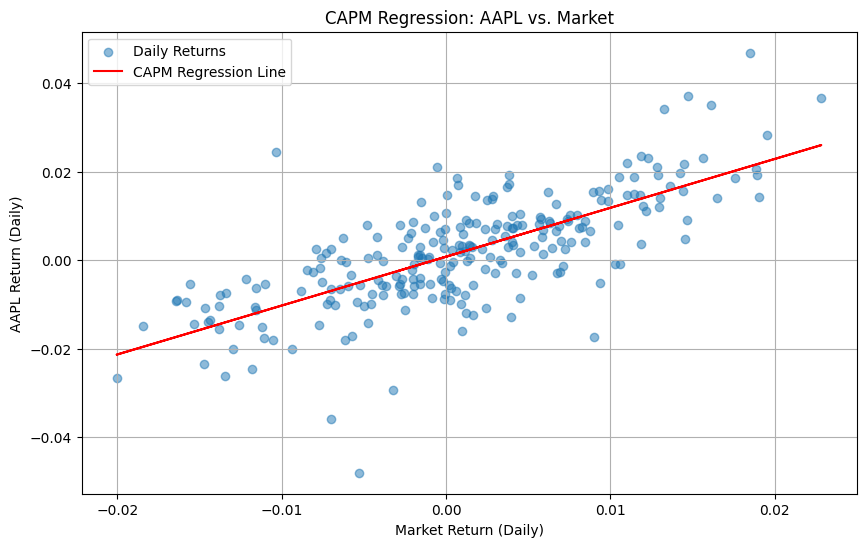

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Download data
stock_symbol = 'AAPL'      # Target stock
market_symbol = '^GSPC'    # Market index (S&P 500)
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download closing price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Close']
market_data = yf.download(market_symbol, start=start_date, end=end_date)['Close']

# Step 2: Calculate daily returns
stock_returns = stock_data.pct_change().dropna()
market_returns = market_data.pct_change().dropna()

# Step 3: Align the datasets by date index
data = pd.concat([stock_returns, market_returns], axis=1)
data.columns = ['Stock', 'Market']
data = data.dropna()

# Step 4: Estimate beta and alpha using linear regression
X = sm.add_constant(data['Market'])  # Add intercept term
model = sm.OLS(data['Stock'], X).fit()
beta = model.params['Market']
alpha = model.params['const']

print("Alpha (α):", round(alpha, 4))
print("Beta (β):", round(beta, 4))

# Step 5: Calculate CAPM expected return
risk_free_rate = 0.045  # Assume 4.5% annual risk-free rate
market_return = data['Market'].mean() * 252  # Annualized market return (daily → yearly)

expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
print(f"Expected Annual Return of {stock_symbol} based on CAPM: {expected_return * 100:.2f}%")

# Step 6: Visualize the CAPM regression
plt.figure(figsize=(10, 6))
plt.scatter(data['Market'], data['Stock'], alpha=0.5, label='Daily Returns')
plt.plot(data['Market'], model.predict(X), color='red', label='CAPM Regression Line')
plt.xlabel('Market Return (Daily)')
plt.ylabel(f'{stock_symbol} Return (Daily)')
plt.title(f'CAPM Regression: {stock_symbol} vs. Market')
plt.legend()
plt.grid(True)
plt.show()


=== CAPM Analysis for AAPL ===
Data fetched successfully for AAPL

Results:
Beta: 1.2013
Alpha (annualized): -0.1112 (-11.12%)
R-squared: 0.4931
P-value: 0.0000
Risk-free rate: 0.0500 (5.00%)
Market return: 0.1772 (17.72%)
Expected return (CAPM): 0.2029 (20.29%)
Actual return: 0.0919 (9.19%)
Excess return: -0.1110 (-11.10%)

Interpretation:
High beta (1.20) - Stock is more volatile than market
Negative alpha - Stock underperformed expectations


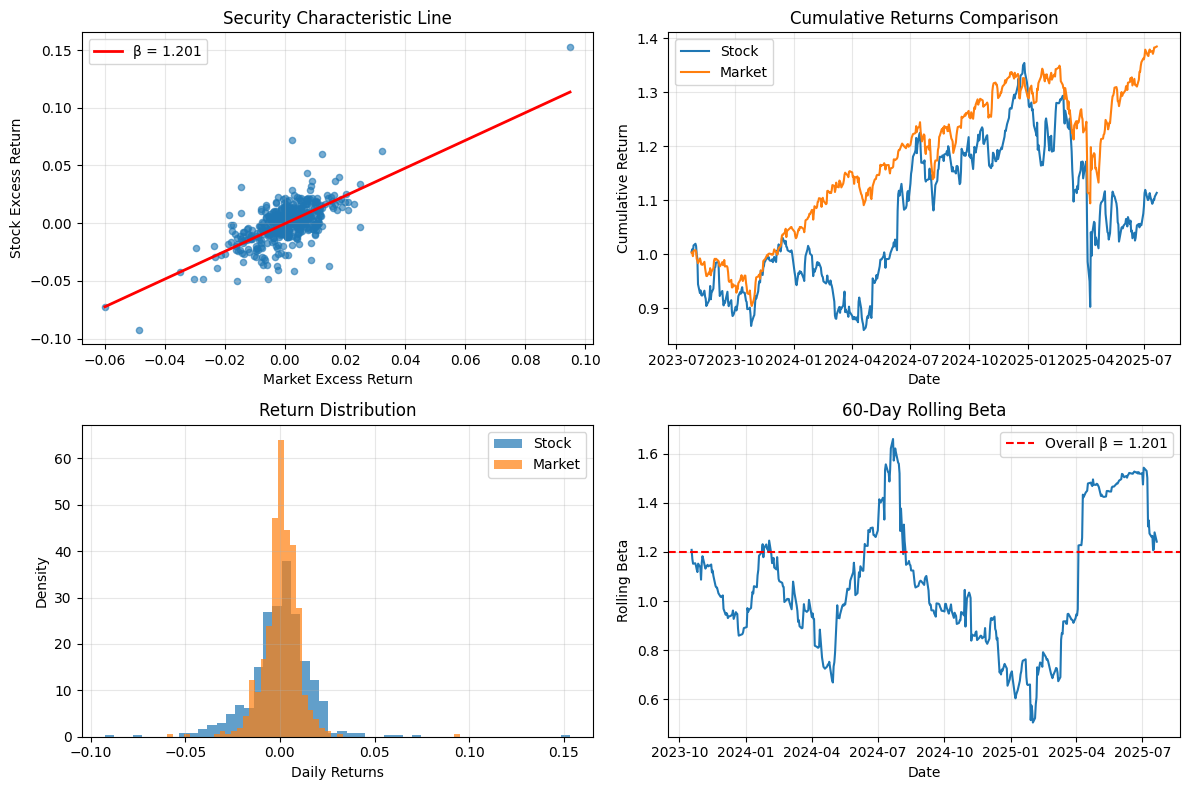


=== Multiple Stock Comparison ===

=== CAPM Analysis for AAPL ===
Data fetched successfully for AAPL

Results:
Beta: 1.2299
Alpha (annualized): -0.1669 (-16.69%)
R-squared: 0.5859
P-value: 0.0000
Risk-free rate: 0.0500 (5.00%)
Market return: 0.1460 (14.60%)
Expected return (CAPM): 0.1681 (16.81%)
Actual return: 0.0015 (0.15%)
Excess return: -0.1666 (-16.66%)

Interpretation:
High beta (1.23) - Stock is more volatile than market
Negative alpha - Stock underperformed expectations


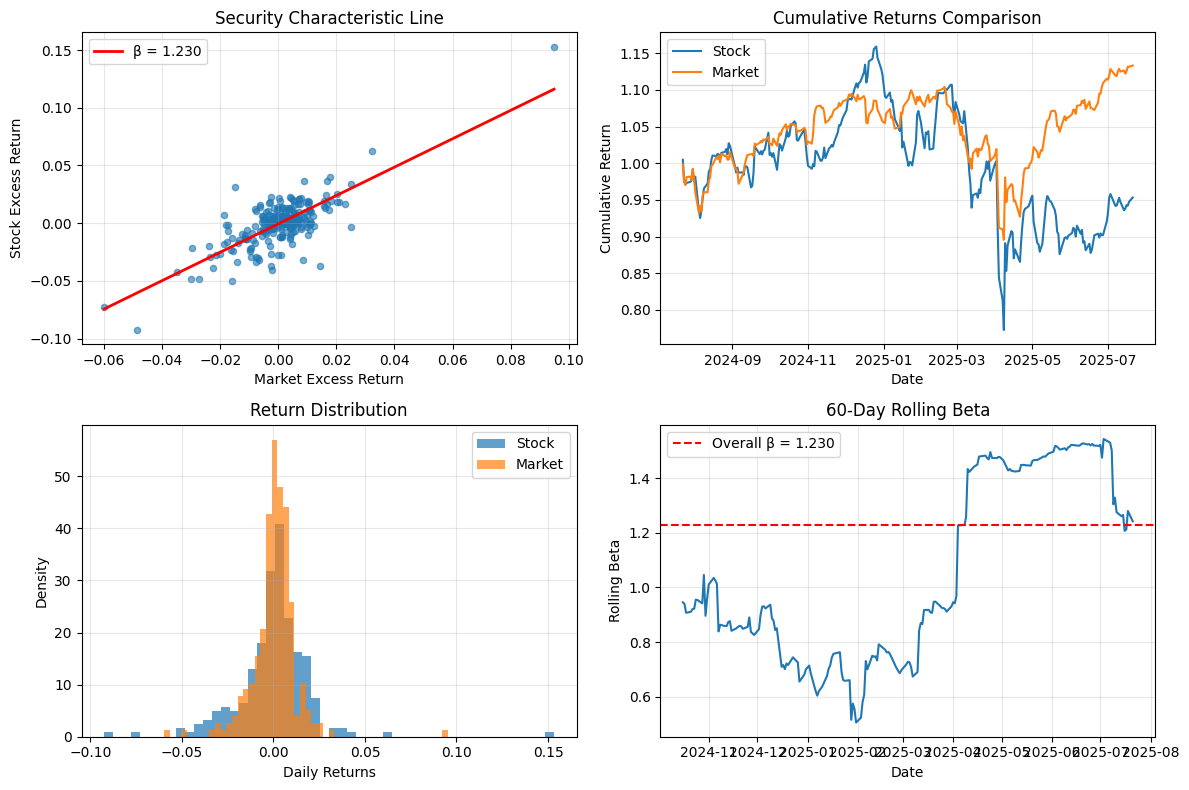


=== CAPM Analysis for GOOGL ===
Data fetched successfully for GOOGL

Results:
Beta: 1.0468
Alpha (annualized): -0.0490 (-4.90%)
R-squared: 0.4232
P-value: 0.0000
Risk-free rate: 0.0500 (5.00%)
Market return: 0.1460 (14.60%)
Expected return (CAPM): 0.1505 (15.05%)
Actual return: 0.1016 (10.16%)
Excess return: -0.0490 (-4.90%)

Interpretation:
High beta (1.05) - Stock is more volatile than market
Negative alpha - Stock underperformed expectations


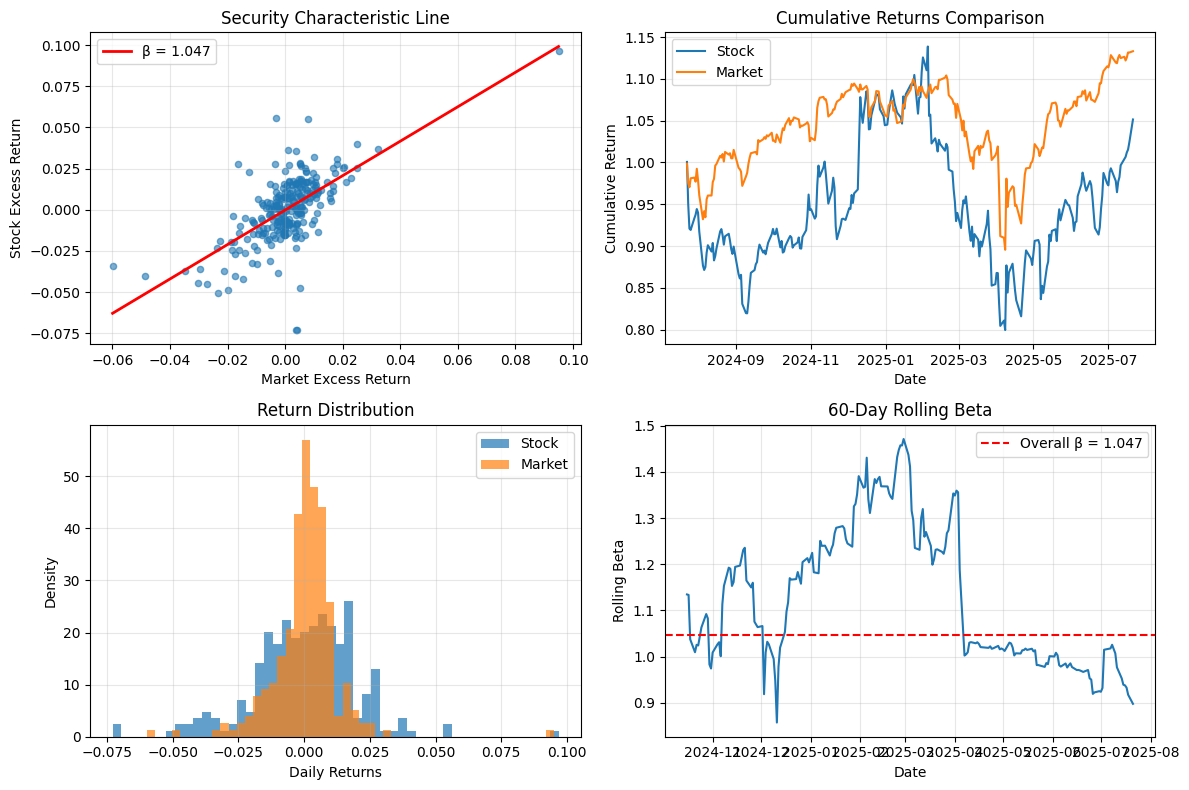


=== CAPM Analysis for MSFT ===
Data fetched successfully for MSFT

Results:
Beta: 0.9666
Alpha (annualized): 0.0393 (3.93%)
R-squared: 0.5754
P-value: 0.0000
Risk-free rate: 0.0500 (5.00%)
Market return: 0.1460 (14.60%)
Expected return (CAPM): 0.1428 (14.28%)
Actual return: 0.1821 (18.21%)
Excess return: 0.0393 (3.93%)

Interpretation:
Low beta (0.97) - Stock is less volatile than market
Positive alpha - Stock outperformed expectations


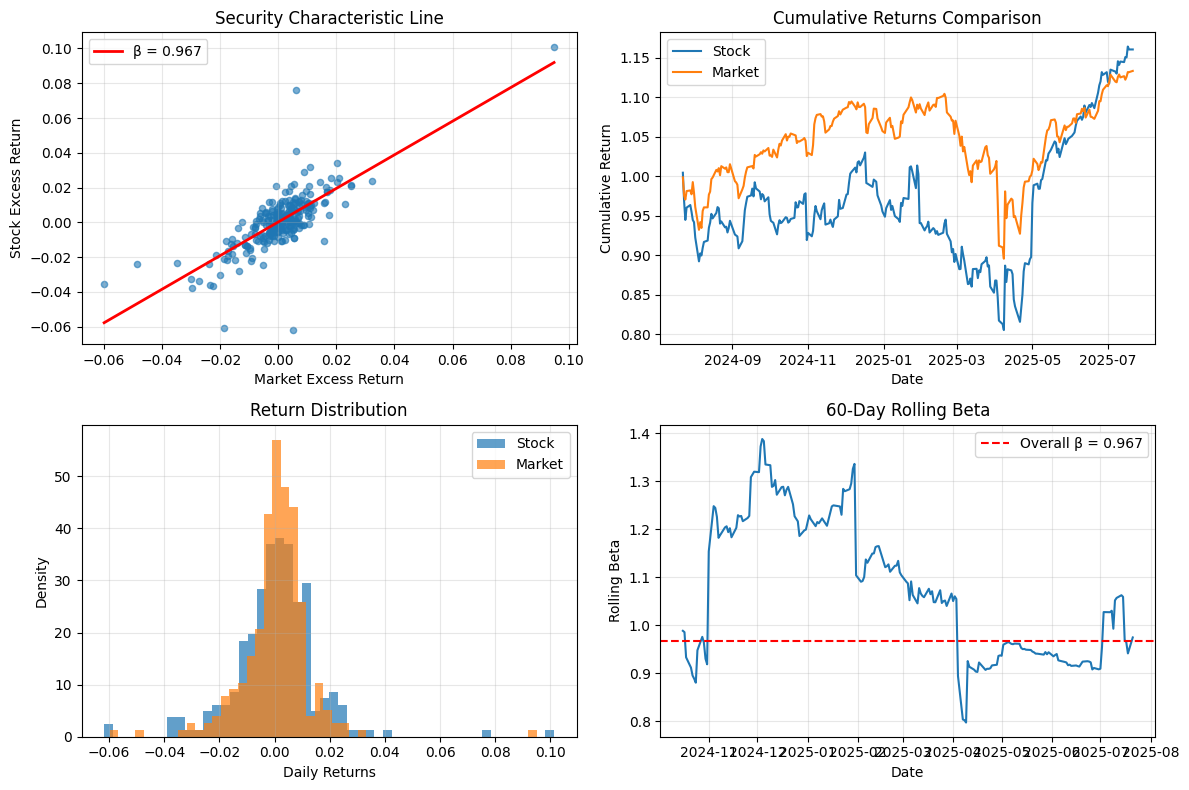


=== CAPM Analysis for TSLA ===
Data fetched successfully for TSLA

Results:
Beta: 2.4606
Alpha (annualized): 0.2478 (24.78%)
R-squared: 0.4388
P-value: 0.0000
Risk-free rate: 0.0500 (5.00%)
Market return: 0.1460 (14.60%)
Expected return (CAPM): 0.2863 (28.63%)
Actual return: 0.5358 (53.58%)
Excess return: 0.2495 (24.95%)

Interpretation:
High beta (2.46) - Stock is more volatile than market
Positive alpha - Stock outperformed expectations


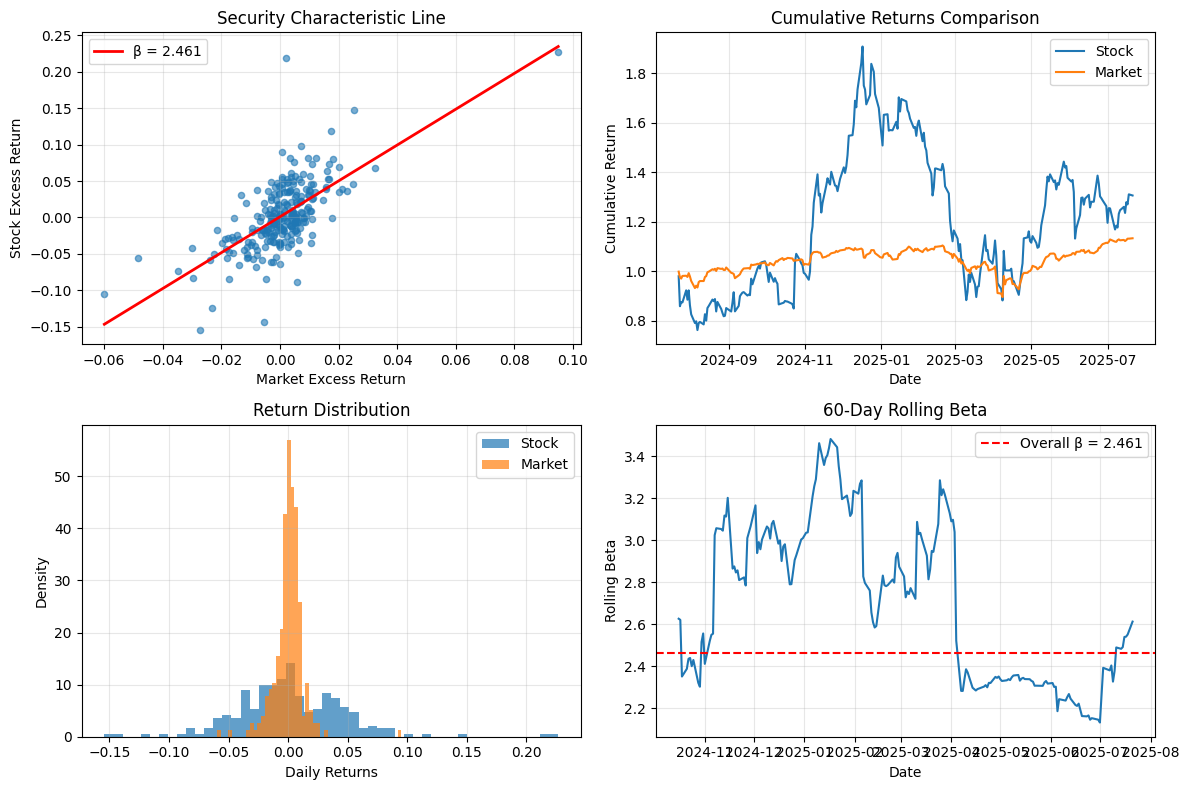


Comparison Summary:
  stock_symbol    beta   alpha  expected_return  actual_return
0         AAPL  1.2299 -0.1669           0.1681         0.0015
1        GOOGL  1.0468 -0.0490           0.1505         0.1016
2         MSFT  0.9666  0.0393           0.1428         0.1821
3         TSLA  2.4606  0.2478           0.2863         0.5358


In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats

class CAPMCalculator:
    def __init__(self):
        self.stock_data = None
        self.market_data = None
        self.risk_free_rate = None
        
    def fetch_data(self, stock_symbol, market_symbol='^GSPC', period='2y', risk_free_rate=0.05):
        """
        Fetch stock and market data
        
        Parameters:
        stock_symbol: Stock ticker (e.g., 'AAPL')
        market_symbol: Market index ticker (default S&P 500)
        period: Data period ('1y', '2y', '5y', etc.)
        risk_free_rate: Risk-free rate (default 5%)
        """
        try:
            # Fetch stock data
            stock = yf.Ticker(stock_symbol)
            self.stock_data = stock.history(period=period)
            
            # Fetch market data
            market = yf.Ticker(market_symbol)
            self.market_data = market.history(period=period)
            
            self.risk_free_rate = risk_free_rate
            
            print(f"Data fetched successfully for {stock_symbol}")
            return True
            
        except Exception as e:
            print(f"Error fetching data: {e}")
            return False
    
    def calculate_returns(self):
        """Calculate daily returns for stock and market"""
        if self.stock_data is None or self.market_data is None:
            raise ValueError("Data not loaded. Run fetch_data() first.")
        
        # Calculate daily returns
        stock_returns = self.stock_data['Close'].pct_change().dropna()
        market_returns = self.market_data['Close'].pct_change().dropna()
        
        # Align dates
        common_dates = stock_returns.index.intersection(market_returns.index)
        stock_returns = stock_returns.loc[common_dates]
        market_returns = market_returns.loc[common_dates]
        
        return stock_returns, market_returns
    
    def calculate_beta(self, stock_returns, market_returns):
        """Calculate beta using linear regression"""
        # Remove risk-free rate to get excess returns
        daily_rf = (1 + self.risk_free_rate) ** (1/252) - 1
        
        stock_excess = stock_returns - daily_rf
        market_excess = market_returns - daily_rf
        
        # Calculate beta using regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(market_excess, stock_excess)
        
        return slope, r_value**2, intercept, p_value
    
    def calculate_expected_return(self, beta, market_return=None):
        """
        Calculate expected return using CAPM formula:
        E(R) = Rf + β(E(Rm) - Rf)
        """
        if market_return is None:
            # Use historical market return
            _, market_returns = self.calculate_returns()
            market_return = market_returns.mean() * 252  # Annualize
        
        expected_return = self.risk_free_rate + beta * (market_return - self.risk_free_rate)
        return expected_return
    
    def full_capm_analysis(self, stock_symbol, market_symbol='^GSPC', period='2y', risk_free_rate=0.05):
        """Complete CAPM analysis"""
        print(f"\n=== CAPM Analysis for {stock_symbol} ===")
        
        # Fetch data
        if not self.fetch_data(stock_symbol, market_symbol, period, risk_free_rate):
            return None
        
        # Calculate returns
        stock_returns, market_returns = self.calculate_returns()
        
        # Calculate beta
        beta, r_squared, alpha, p_value = self.calculate_beta(stock_returns, market_returns)
        
        # Calculate expected return
        market_return_annual = market_returns.mean() * 252
        expected_return = self.calculate_expected_return(beta, market_return_annual)
        
        # Calculate actual return
        actual_return = stock_returns.mean() * 252
        
        # Results
        results = {
            'stock_symbol': stock_symbol,
            'beta': beta,
            'alpha': alpha * 252,  # Annualize alpha
            'r_squared': r_squared,
            'p_value': p_value,
            'expected_return': expected_return,
            'actual_return': actual_return,
            'market_return': market_return_annual,
            'risk_free_rate': risk_free_rate,
            'excess_return': actual_return - expected_return
        }
        
        self.print_results(results)
        self.plot_analysis(stock_returns, market_returns, beta, alpha)
        
        return results
    
    def print_results(self, results):
        """Print formatted results"""
        print(f"\nResults:")
        print(f"Beta: {results['beta']:.4f}")
        print(f"Alpha (annualized): {results['alpha']:.4f} ({results['alpha']*100:.2f}%)")
        print(f"R-squared: {results['r_squared']:.4f}")
        print(f"P-value: {results['p_value']:.4f}")
        print(f"Risk-free rate: {results['risk_free_rate']:.4f} ({results['risk_free_rate']*100:.2f}%)")
        print(f"Market return: {results['market_return']:.4f} ({results['market_return']*100:.2f}%)")
        print(f"Expected return (CAPM): {results['expected_return']:.4f} ({results['expected_return']*100:.2f}%)")
        print(f"Actual return: {results['actual_return']:.4f} ({results['actual_return']*100:.2f}%)")
        print(f"Excess return: {results['excess_return']:.4f} ({results['excess_return']*100:.2f}%)")
        
        # Interpretation
        print(f"\nInterpretation:")
        if results['beta'] > 1:
            print(f"High beta ({results['beta']:.2f}) - Stock is more volatile than market")
        elif results['beta'] < 1:
            print(f"Low beta ({results['beta']:.2f}) - Stock is less volatile than market")
        else:
            print(f"Beta ≈ 1 - Stock moves with the market")
            
        if results['alpha'] > 0.02:
            print(f"Positive alpha - Stock outperformed expectations")
        elif results['alpha'] < -0.02:
            print(f"Negative alpha - Stock underperformed expectations")
        else:
            print(f"Alpha ≈ 0 - Stock performed as expected")
    
    def plot_analysis(self, stock_returns, market_returns, beta, alpha):
        """Create visualization of CAPM analysis"""
        # Remove risk-free rate
        daily_rf = (1 + self.risk_free_rate) ** (1/252) - 1
        stock_excess = stock_returns - daily_rf
        market_excess = market_returns - daily_rf
        
        plt.figure(figsize=(12, 8))
        
        # Subplot 1: Security Characteristic Line
        plt.subplot(2, 2, 1)
        plt.scatter(market_excess, stock_excess, alpha=0.6, s=20)
        
        # Regression line
        x_line = np.linspace(market_excess.min(), market_excess.max(), 100)
        y_line = alpha + beta * x_line
        plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'β = {beta:.3f}')
        
        plt.xlabel('Market Excess Return')
        plt.ylabel('Stock Excess Return')
        plt.title('Security Characteristic Line')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Returns comparison
        plt.subplot(2, 2, 2)
        cumulative_stock = (1 + stock_returns).cumprod()
        cumulative_market = (1 + market_returns).cumprod()
        
        plt.plot(cumulative_stock.index, cumulative_stock, label='Stock')
        plt.plot(cumulative_market.index, cumulative_market, label='Market')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')
        plt.title('Cumulative Returns Comparison')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: Return distribution
        plt.subplot(2, 2, 3)
        plt.hist(stock_returns, bins=50, alpha=0.7, label='Stock', density=True)
        plt.hist(market_returns, bins=50, alpha=0.7, label='Market', density=True)
        plt.xlabel('Daily Returns')
        plt.ylabel('Density')
        plt.title('Return Distribution')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 4: Rolling beta
        plt.subplot(2, 2, 4)
        window = 60  # 60-day rolling window
        rolling_beta = []
        
        for i in range(window, len(stock_returns)):
            stock_window = stock_returns.iloc[i-window:i]
            market_window = market_returns.iloc[i-window:i]
            
            daily_rf = (1 + self.risk_free_rate) ** (1/252) - 1
            stock_excess_window = stock_window - daily_rf
            market_excess_window = market_window - daily_rf
            
            beta_window = np.cov(stock_excess_window, market_excess_window)[0,1] / np.var(market_excess_window)
            rolling_beta.append(beta_window)
        
        rolling_dates = stock_returns.index[window:]
        plt.plot(rolling_dates, rolling_beta)
        plt.axhline(y=beta, color='r', linestyle='--', label=f'Overall β = {beta:.3f}')
        plt.xlabel('Date')
        plt.ylabel('Rolling Beta')
        plt.title(f'{window}-Day Rolling Beta')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Example usage
def example_usage():
    """Example of how to use the CAPM calculator"""
    capm = CAPMCalculator()
    
    # Analyze Apple stock
    results = capm.full_capm_analysis('AAPL', period='2y', risk_free_rate=0.05)
    
    # You can also calculate for multiple stocks
    stocks = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
    
    print(f"\n=== Multiple Stock Comparison ===")
    comparison_results = []
    
    for stock in stocks:
        capm_new = CAPMCalculator()
        result = capm_new.full_capm_analysis(stock, period='1y', risk_free_rate=0.05)
        if result:
            comparison_results.append(result)
    
    # Create comparison DataFrame
    if comparison_results:
        df = pd.DataFrame(comparison_results)
        print(f"\nComparison Summary:")
        print(df[['stock_symbol', 'beta', 'alpha', 'expected_return', 'actual_return']].round(4))

if __name__ == "__main__":
    example_usage()

In [7]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Step 1: Black-Scholes Call Option Pricing Formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    return call_price

# Step 2: Market data (suppose these come from a real exchange)
S = 100      # Current stock price
K = 100      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate (5%)
market_price = 10  # Market price of the option

# Step 3: Calibration function: minimize the difference between model and market price
def objective_function(sigma):
    model_price = black_scholes_call(S, K, T, r, sigma[0])
    return (model_price - market_price)**2  # Squared error

# Step 4: Initial guess for volatility and run optimization
initial_guess = [0.2]
result = minimize(objective_function, initial_guess, bounds=[(0.0001, 2.0)])

# Output calibrated volatility
calibrated_sigma = result.x[0]
print(f"Calibrated volatility (σ): {calibrated_sigma:.4f}")
print(f"Model price with calibrated σ: {black_scholes_call(S, K, T, r, calibrated_sigma):.4f}")


Calibrated volatility (σ): 0.1880
Model price with calibrated σ: 10.0000


In [8]:
import numpy as np
import pandas as pd

# Step 1: Setup parameters
np.random.seed(42)

num_assets = 5
num_factors = 3

# Risk-free rate (constant)
risk_free_rate = 0.02  # 2%

# Simulated factor risk premiums (e.g., GDP, inflation, interest rate)
factor_premiums = np.array([0.04, -0.01, 0.03])  # 4%, -1%, 3%

# Random beta matrix: how sensitive each asset is to each factor
betas = np.random.rand(num_assets, num_factors)

# Step 2: Apply APT formula
expected_returns = risk_free_rate + betas.dot(factor_premiums)

# Step 3: Display results
df = pd.DataFrame(betas, columns=['Beta_Factor1', 'Beta_Factor2', 'Beta_Factor3'])
df['Expected Return'] = expected_returns

print("=== APT Simulation: Expected Returns for 5 Assets ===")
print(df)


=== APT Simulation: Expected Returns for 5 Assets ===
   Beta_Factor1  Beta_Factor2  Beta_Factor3  Expected Return
0      0.374540      0.950714      0.731994         0.047434
1      0.598658      0.156019      0.155995         0.047066
2      0.058084      0.866176      0.601115         0.031695
3      0.708073      0.020584      0.969910         0.077214
4      0.832443      0.212339      0.181825         0.056629


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

class APTSimulator:
    def __init__(self, n_assets=10, n_factors=3, n_periods=252):
        """
        Initialize APT Simulator
        
        Parameters:
        n_assets: Number of assets to simulate
        n_factors: Number of risk factors
        n_periods: Number of time periods
        """
        self.n_assets = n_assets
        self.n_factors = n_factors
        self.n_periods = n_periods
        
        # Model parameters
        self.alpha = None  # Intercepts (expected returns)
        self.beta = None   # Factor loadings
        self.factor_returns = None
        self.idiosyncratic_risk = None
        self.asset_returns = None
        
    def generate_factor_loadings(self, loading_range=(-2, 2), seed=42):
        """Generate factor loadings (betas) for each asset"""
        np.random.seed(seed)
        
        # Generate factor loadings matrix (n_assets x n_factors)
        self.beta = np.random.uniform(loading_range[0], loading_range[1], 
                                     (self.n_assets, self.n_factors))
        
        # Make some factors more important for certain assets
        # Factor 1: Market factor (affects all assets)
        self.beta[:, 0] = np.random.normal(1.0, 0.3, self.n_assets)
        
        if self.n_factors > 1:
            # Factor 2: Size factor (affects small/large cap differently)
            self.beta[:self.n_assets//2, 1] = np.random.normal(0.8, 0.2, self.n_assets//2)
            self.beta[self.n_assets//2:, 1] = np.random.normal(-0.5, 0.2, self.n_assets - self.n_assets//2)
        
        if self.n_factors > 2:
            # Factor 3: Value factor (affects growth/value differently)
            self.beta[:self.n_assets//3, 2] = np.random.normal(0.6, 0.15, self.n_assets//3)
            self.beta[self.n_assets//3:2*self.n_assets//3, 2] = np.random.normal(0, 0.1, self.n_assets//3)
            self.beta[2*self.n_assets//3:, 2] = np.random.normal(-0.4, 0.15, self.n_assets - 2*self.n_assets//3)
        
        return self.beta
    
    def generate_factor_returns(self, factor_vol=[0.15, 0.10, 0.08], correlations=None, seed=42):
        """
        Generate factor returns with specified volatilities and correlations
        
        Parameters:
        factor_vol: List of factor volatilities (annualized)
        correlations: Correlation matrix between factors
        """
        np.random.seed(seed)
        
        # Convert annual volatilities to daily
        daily_vol = [vol / np.sqrt(252) for vol in factor_vol[:self.n_factors]]
        
        if correlations is None:
            # Default correlation structure
            correlations = np.eye(self.n_factors)
            if self.n_factors > 1:
                correlations[0, 1] = correlations[1, 0] = 0.3  # Market-Size correlation
            if self.n_factors > 2:
                correlations[0, 2] = correlations[2, 0] = 0.2  # Market-Value correlation
                correlations[1, 2] = correlations[2, 1] = -0.1  # Size-Value correlation
        
        # Generate correlated factor returns
        mean_returns = np.zeros(self.n_factors)
        cov_matrix = np.outer(daily_vol, daily_vol) * correlations
        
        self.factor_returns = np.random.multivariate_normal(
            mean_returns, cov_matrix, self.n_periods
        )
        
        return self.factor_returns
    
    def generate_idiosyncratic_returns(self, idio_vol_range=(0.05, 0.25), seed=42):
        """Generate idiosyncratic (asset-specific) returns"""
        np.random.seed(seed)
        
        # Different idiosyncratic volatilities for each asset
        idio_vols = np.random.uniform(idio_vol_range[0], idio_vol_range[1], self.n_assets)
        daily_idio_vols = idio_vols / np.sqrt(252)
        
        # Generate uncorrelated idiosyncratic returns
        self.idiosyncratic_risk = np.random.normal(
            0, daily_idio_vols.reshape(1, -1), (self.n_periods, self.n_assets)
        )
        
        return self.idiosyncratic_risk
    
    def generate_expected_returns(self, risk_free_rate=0.03, factor_premiums=None, seed=42):
        """Generate expected returns (alphas) based on factor loadings"""
        np.random.seed(seed)
        
        if factor_premiums is None:
            # Default factor risk premiums (annualized)
            factor_premiums = [0.08, 0.03, 0.02][:self.n_factors]  # Market, Size, Value
        
        # Calculate expected returns using APT formula
        # E(R_i) = R_f + sum(beta_ij * lambda_j)
        self.alpha = np.full(self.n_assets, risk_free_rate / 252)  # Daily risk-free rate
        
        for j in range(self.n_factors):
            self.alpha += self.beta[:, j] * (factor_premiums[j] / 252)  # Daily premium
        
        return self.alpha
    
    def simulate_returns(self, risk_free_rate=0.03, factor_premiums=None, 
                        factor_vol=[0.15, 0.10, 0.08], correlations=None,
                        loading_range=(-2, 2), idio_vol_range=(0.05, 0.25), seed=42):
        """
        Complete APT return simulation
        
        The APT model: R_it = α_i + Σ(β_ij * F_jt) + ε_it
        where:
        - R_it: Return of asset i at time t
        - α_i: Expected return of asset i
        - β_ij: Loading of asset i on factor j
        - F_jt: Return of factor j at time t
        - ε_it: Idiosyncratic return of asset i at time t
        """
        
        print("Simulating APT returns...")
        print(f"Assets: {self.n_assets}, Factors: {self.n_factors}, Periods: {self.n_periods}")
        
        # Generate all components
        self.generate_factor_loadings(loading_range, seed)
        self.generate_factor_returns(factor_vol, correlations, seed)
        self.generate_idiosyncratic_returns(idio_vol_range, seed)
        self.generate_expected_returns(risk_free_rate, factor_premiums, seed)
        
        # Simulate returns using APT formula
        # R_it = α_i + Σ(β_ij * F_jt) + ε_it
        systematic_returns = np.dot(self.factor_returns, self.beta.T)  # (n_periods x n_assets)
        
        self.asset_returns = (self.alpha.reshape(1, -1) + 
                             systematic_returns + 
                             self.idiosyncratic_risk)
        
        print("Simulation complete!")
        return self.asset_returns
    
    def analyze_results(self):
        """Analyze the simulated returns"""
        if self.asset_returns is None:
            raise ValueError("No returns simulated. Run simulate_returns() first.")
        
        # Basic statistics
        annual_returns = self.asset_returns.mean(axis=0) * 252
        annual_volatility = self.asset_returns.std(axis=0) * np.sqrt(252)
        sharpe_ratios = (annual_returns - 0.03) / annual_volatility  # Assuming 3% risk-free rate
        
        # Create results DataFrame
        results_df = pd.DataFrame({
            'Asset': [f'Asset_{i+1}' for i in range(self.n_assets)],
            'Annual_Return': annual_returns,
            'Annual_Volatility': annual_volatility,
            'Sharpe_Ratio': sharpe_ratios
        })
        
        # Add factor loadings
        for j in range(self.n_factors):
            results_df[f'Factor_{j+1}_Loading'] = self.beta[:, j]
        
        return results_df
    
    def estimate_factors_pca(self):
        """Estimate factors using Principal Component Analysis"""
        if self.asset_returns is None:
            raise ValueError("No returns simulated. Run simulate_returns() first.")
        
        # Standardize returns
        scaler = StandardScaler()
        scaled_returns = scaler.fit_transform(self.asset_returns)
        
        # Apply PCA
        pca = PCA(n_components=self.n_factors)
        estimated_factors = pca.fit_transform(scaled_returns)
        
        # Get loadings
        estimated_loadings = pca.components_.T
        
        return estimated_factors, estimated_loadings, pca.explained_variance_ratio_
    
    def estimate_factors_ml(self):
        """Estimate factors using Maximum Likelihood Factor Analysis"""
        if self.asset_returns is None:
            raise ValueError("No returns simulated. Run simulate_returns() first.")
        
        # Apply Factor Analysis
        fa = FactorAnalysis(n_components=self.n_factors, random_state=42)
        estimated_factors = fa.fit_transform(self.asset_returns)
        estimated_loadings = fa.components_.T
        
        return estimated_factors, estimated_loadings
    
    def plot_results(self):
        """Create comprehensive plots of the simulation results"""
        if self.asset_returns is None:
            raise ValueError("No returns simulated. Run simulate_returns() first.")
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # 1. Asset returns correlation matrix
        corr_matrix = np.corrcoef(self.asset_returns.T)
        im1 = axes[0, 0].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        axes[0, 0].set_title('Asset Returns Correlation Matrix')
        axes[0, 0].set_xlabel('Assets')
        axes[0, 0].set_ylabel('Assets')
        plt.colorbar(im1, ax=axes[0, 0])
        
        # 2. Factor loadings heatmap
        im2 = axes[0, 1].imshow(self.beta, cmap='RdBu', aspect='auto')
        axes[0, 1].set_title('Factor Loadings (β)')
        axes[0, 1].set_xlabel('Factors')
        axes[0, 1].set_ylabel('Assets')
        plt.colorbar(im2, ax=axes[0, 1])
        
        # 3. Factor returns over time
        for j in range(min(3, self.n_factors)):
            axes[0, 2].plot(np.cumsum(self.factor_returns[:, j]), 
                           label=f'Factor {j+1}', alpha=0.8)
        axes[0, 2].set_title('Cumulative Factor Returns')
        axes[0, 2].set_xlabel('Time')
        axes[0, 2].set_ylabel('Cumulative Return')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Risk-Return scatter plot
        annual_returns = self.asset_returns.mean(axis=0) * 252
        annual_volatility = self.asset_returns.std(axis=0) * np.sqrt(252)
        
        scatter = axes[1, 0].scatter(annual_volatility, annual_returns, 
                                   c=self.beta[:, 0], cmap='viridis', s=100, alpha=0.7)
        axes[1, 0].set_xlabel('Annual Volatility')
        axes[1, 0].set_ylabel('Annual Return')
        axes[1, 0].set_title('Risk-Return Profile (colored by Factor 1 loading)')
        plt.colorbar(scatter, ax=axes[1, 0])
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. Sample asset return distribution
        sample_asset = 0
        axes[1, 1].hist(self.asset_returns[:, sample_asset], bins=50, alpha=0.7, density=True)
        axes[1, 1].axvline(self.asset_returns[:, sample_asset].mean(), 
                          color='red', linestyle='--', label='Mean')
        axes[1, 1].set_xlabel('Daily Returns')
        axes[1, 1].set_ylabel('Density')
        axes[1, 1].set_title(f'Return Distribution - Asset {sample_asset + 1}')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        # 6. Explained variance from PCA
        _, _, explained_var = self.estimate_factors_pca()
        axes[1, 2].bar(range(1, len(explained_var) + 1), explained_var)
        axes[1, 2].set_xlabel('Principal Component')
        axes[1, 2].set_ylabel('Explained Variance Ratio')
        axes[1, 2].set_title('Variance Explained by Factors (PCA)')
        axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def compare_factor_estimation_methods(self):
        """Compare true factors with estimated factors"""
        if self.asset_returns is None:
            raise ValueError("No returns simulated. Run simulate_returns() first.")
        
        # Estimate factors using different methods
        pca_factors, pca_loadings, _ = self.estimate_factors_pca()
        ml_factors, ml_loadings = self.estimate_factors_ml()
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Compare true vs PCA loadings
        for j in range(min(2, self.n_factors)):
            axes[0, j].scatter(self.beta[:, j], pca_loadings[:, j], alpha=0.7)
            axes[0, j].plot([self.beta[:, j].min(), self.beta[:, j].max()], 
                           [self.beta[:, j].min(), self.beta[:, j].max()], 
                           'r--', alpha=0.8)
            
            # Calculate correlation
            corr = np.corrcoef(self.beta[:, j], pca_loadings[:, j])[0, 1]
            axes[0, j].set_xlabel(f'True Factor {j+1} Loading')
            axes[0, j].set_ylabel(f'PCA Factor {j+1} Loading')
            axes[0, j].set_title(f'PCA vs True Loadings (ρ={corr:.3f})')
            axes[0, j].grid(True, alpha=0.3)
        
        # Compare true vs ML loadings
        for j in range(min(2, self.n_factors)):
            axes[1, j].scatter(self.beta[:, j], ml_loadings[:, j], alpha=0.7, color='orange')
            axes[1, j].plot([self.beta[:, j].min(), self.beta[:, j].max()], 
                           [self.beta[:, j].min(), self.beta[:, j].max()], 
                           'r--', alpha=0.8)
            
            # Calculate correlation
            corr = np.corrcoef(self.beta[:, j], ml_loadings[:, j])[0, 1]
            axes[1, j].set_xlabel(f'True Factor {j+1} Loading')
            axes[1, j].set_ylabel(f'ML Factor {j+1} Loading')
            axes[1, j].set_title(f'ML vs True Loadings (ρ={corr:.3f})')
            axes[1, j].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return pca_loadings, ml_loadings

# Example usage and demonstration
def demo_apt_simulation():
    """Demonstration of APT simulation capabilities"""
    
    print("=== Arbitrage Pricing Theory (APT) Simulation Demo ===\n")
    
    # Create APT simulator
    apt = APTSimulator(n_assets=20, n_factors=3, n_periods=252*2)  # 2 years daily data
    
    # Simulate returns with custom parameters
    returns = apt.simulate_returns(
        risk_free_rate=0.03,
        factor_premiums=[0.08, 0.03, 0.02],  # Market, Size, Value premiums
        factor_vol=[0.16, 0.12, 0.10],       # Factor volatilities
        loading_range=(-1.5, 2.0),           # Factor loading range
        idio_vol_range=(0.10, 0.30),         # Idiosyncratic volatility range
        seed=42
    )
    
    # Analyze results
    print("\n=== Analysis Results ===")
    results = apt.analyze_results()
    print(results.round(4))
    
    # Plot results
    apt.plot_results()
    
    # Compare factor estimation methods
    print("\n=== Factor Estimation Comparison ===")
    pca_loadings, ml_loadings = apt.compare_factor_estimation_methods()
    
    # Calculate factor estimation accuracy
    for j in range(apt.n_factors):
        pca_corr = np.corrcoef(apt.beta[:, j], pca_loadings[:, j])[0, 1]
        ml_corr = np.corrcoef(apt.beta[:, j], ml_loadings[:, j])[0, 1]
        print(f"Factor {j+1} - PCA correlation: {pca_corr:.3f}, ML correlation: {ml_corr:.3f}")
    
    return apt, results

def monte_carlo_apt():
    """Monte Carlo simulation to test APT properties"""
    print("\n=== Monte Carlo APT Testing ===")
    
    n_simulations = 100
    n_assets = 15
    n_factors = 3
    
    correlations_pca = []
    correlations_ml = []
    
    for sim in range(n_simulations):
        apt = APTSimulator(n_assets=n_assets, n_factors=n_factors, n_periods=252)
        apt.simulate_returns(seed=sim)
        
        # Estimate factors
        pca_factors, pca_loadings, _ = apt.estimate_factors_pca()
        ml_factors, ml_loadings = apt.estimate_factors_ml()
        
        # Calculate correlations with true loadings
        pca_corr = [np.corrcoef(apt.beta[:, j], pca_loadings[:, j])[0, 1] 
                    for j in range(n_factors)]
        ml_corr = [np.corrcoef(apt.beta[:, j], ml_loadings[:, j])[0, 1] 
                   for j in range(n_factors)]
        
        correlations_pca.append(pca_corr)
        correlations_ml.append(ml_corr)
        
        if (sim + 1) % 20 == 0:
            print(f"Completed {sim + 1}/{n_simulations} simulations")
    
    # Analyze results
    correlations_pca = np.array(correlations_pca)
    correlations_ml = np.array(correlations_ml)
    
    print(f"\nAverage correlations across {n_simulations} simulations:")
    for j in range(n_factors):
        print(f"Factor {j+1}:")
        print(f"  PCA: {correlations_pca[:, j].mean():.3f} ± {correlations_pca[:, j].std():.3f}")
        print(f"  ML:  {correlations_ml[:, j].mean():.3f} ± {correlations_ml[:, j].std():.3f}")

if __name__ == "__main__":
    # Run demonstration
    apt_model, results = demo_apt_simulation()
    
    # Run Monte Carlo test
    monte_carlo_apt()

=== Arbitrage Pricing Theory (APT) Simulation Demo ===

Simulating APT returns...
Assets: 20, Factors: 3, Periods: 504


ValueError: could not broadcast input array from shape (6,) into shape (7,)